In [1]:
import numpy as np
import matplotlib.pyplot as plt, matplotlib as mpl
import random

import mplhep as hep

hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [130]:
#  solution fount https://stackoverflow.com/questions/44526103/matplotlib-draw-curved-arrow-that-looks-just-like-pyplot-arrow
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
def circarrow(self,diameter,centX,centY,startangle,angle,**kwargs):
    startarrow=kwargs.pop("startarrow",False)
    endarrow=kwargs.pop("endarrow",False)

    arc = Arc([centX,centY],diameter,diameter,angle=startangle,
          #theta1=np.rad2deg(kwargs.get("head_length",1.5*3*.001)) if startarrow else 0,theta2=angle-(np.rad2deg(kwargs.get("head_length",1.5*3*.001)) if endarrow else 0),
          theta1=np.rad2deg(kwargs.get("head_length",1.5*3*.001)) if startarrow else 0,
            theta2=angle-(np.rad2deg(kwargs.get("head_length",1.5*3*.001)) if endarrow else 0),
          
              linestyle="-",color=kwargs.get("color","black"), linewidth=kwargs.get("linewidth"))
    self.gca().add_patch(arc)

    if startarrow:
        startX=diameter/2*np.cos(np.radians(startangle)+kwargs.get("head_length",1.5*3*.001))
        startY=diameter/2*np.sin(np.radians(startangle)+kwargs.get("head_length",1.5*3*.001))
        startDX=+.000001*diameter/2*np.sin(np.radians(startangle))
        startDY=-.000001*diameter/2*np.cos(np.radians(startangle))
        kwargs['linewidth']=1
        self.arrow(startX-startDX,startY-startDY,startDX,startDY,**kwargs)

    if endarrow:
        endX=diameter/2*np.cos(np.radians(startangle+angle)-kwargs.get("head_length",1.5*3*.001))
        endY=diameter/2*np.sin(np.radians(startangle+angle)-kwargs.get("head_length",1.5*3*.001))
        endDX=-.000001*diameter/2*np.sin(np.radians(startangle+angle))
        endDY=+.000001*diameter/2*np.cos(np.radians(startangle+angle))
        kwargs['linewidth']=1
        self.arrow(endX-endDX,endY-endDY,endDX,endDY,**kwargs)

import types
plt.circarrow = types.MethodType(circarrow,plt)
plt.show()

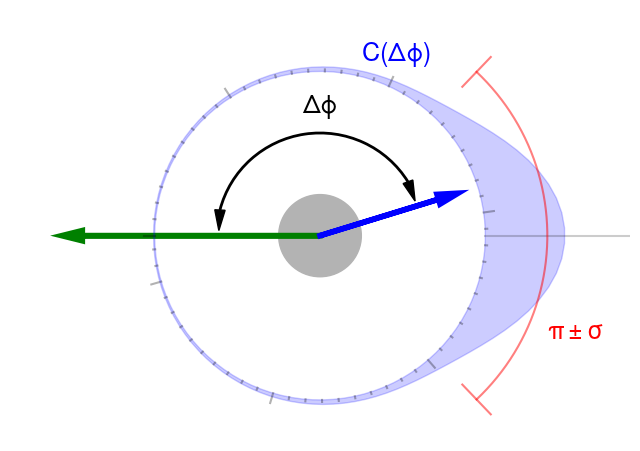

In [187]:
fig, ax = plt.subplots(1,1, figsize=(8,8*4.2/6))
c=3
plt.xlim(-3,3)
plt.ylim(-2,2.2)

#nucleus
plt.gca().add_patch(mpl.patches.Circle((0, 0), 0.4, color='0.7'))

#arrows for pT
arrowstyle=dict(head_width=0.1, head_length=0.2, linewidth=4)
plt.arrow(0,0, -2.3, 0, **arrowstyle, color='g')
phi=.3
plt.arrow(0,0, 1.2*np.cos(phi), 1.2*np.sin(phi), **arrowstyle, color='b')

#Delta phi
arrowstyle=dict(head_width=0.1, head_length=0.2, linewidth=2)
a=3
plt.circarrow(2,0,0,phi*180/np.pi+a, (np.pi-phi)*180/np.pi-2*a, **arrowstyle, 
              startarrow=True, endarrow=True, color='k')
fontsize=18
plt.text(0, 1.2, "$\Delta\phi$", fontsize=fontsize,horizontalalignment="center")


#define a pdf
def pdf(theta):
    gauss_sigma1=0.4
    gauss_sigma2=1.6
    return np.exp(-(theta)**2/(2*gauss_sigma1**2))+.1*np.exp(-(theta)**2/(2*gauss_sigma2**2))


theta=np.linspace(-np.pi, np.pi, 100)
RMS = np.sqrt(sum(pdf(theta)*theta**2)/sum(pdf(theta)))

r=1.6+.7*pdf(theta)

x,y=r*np.cos(theta), r*np.sin(theta)
r=1.6
x2,y2=r*np.cos(-theta),r*np.sin(-theta)
x=np.concatenate((x,x2,x[0:1]))
y=np.concatenate((y, y2, y[0:1]))
#help(mpl.patches.Polygon)
xy=[(x[i],y[i]) for i in range(len(x))]
plt.gca().add_patch(mpl.patches.Polygon(xy, color='b', alpha=0.2))

plt.text(0.4, 1.7, "$C(\Delta\phi)$", fontsize=fontsize, rotation=0, color='b')

#plt.circarrow(3,0,0,-RMS*180/np.pi, RMS*180/np.pi, **arrowstyle, 
#              startarrow=True, endarrow=False, color='k')

r=1.6
dr=0.1
for i in range(63):
    dr = 0.1 if  i%10==0 else .02
    th=np.pi-0.1*i
    plt.plot((r*np.cos(th), (r+dr)*np.cos(th)), (r*np.sin(th), (r+dr)*np.sin(th)), 
           color='k', alpha=0.3)

    
# at pi
plt.plot((r, 3),(0,0), color='k', alpha=0.2)


theta=np.linspace(-RMS, RMS)
r=2.2
plt.plot(r*np.cos(theta), r*np.sin(theta), color='r', alpha=0.5)

dr=.2
for theta in RMS, -RMS:
    plt.plot(((r-dr)*np.cos(theta), (r+dr)*np.cos(theta)),
         ((r-dr)*np.sin(theta), (r+dr)*np.sin(theta)),  color='r', alpha=0.5)
plt.text(2.2, -1, "$\\pi\\pm\\sigma$", color='r', fontsize=fontsize)

ax.axis("off")
plt.savefig("corr_width_illustration.pdf")
plt.show()xc ew

In [191]:
a=1
print("a is ", a)
a=2
print("a is ", a)



a is  1
a is  2
